<a href="https://colab.research.google.com/github/raj-vijay/ml/blob/master/Q2_Bike_Friendly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 2 - Numerical Analysis Exercises using NumPy Bike Dataset:**

For each of the following questions you will use the bike rental dataset called bike.csv. Where possible use NumPy to answer the questions below.

The following are the details of the various fields in this dataset.
0. instant: record index
1. season : season (1:springer, 2:summer, 3:fall, 4:winter)
2. yr : year (0: 2011, 1:2012)
3. mnth : month ( 1 to 12)
4. hr : hour (0 to 23)
5. holiday : weather day is holiday or not (extracted from [Web Link])
6. weekday : day of the week
7. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
8. + weathersit :
> i. 1: Clear, Few clouds, Partly cloudy, Partly cloudy
> ii. 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
> iii. 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
> iv. 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

9. temp : Normalized temperature in Celsius. The values are divided to 41 (max)
10. atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
11. hum: Normalized humidity. The values are divided to 100 (max)
12. windspeed: Normalized wind speed. The values are divided to 67 (max)
13. casual: count of casual users
14. registered: count of registered users
15. cnt: count of total rental bikes including both casual and registered

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:

import numpy as np
import matplotlib.pyplot as plt


bike_array = np.loadtxt('/content/drive/My Drive/00.Data/bike.csv', delimiter = ',')
# Test bke dataset
# print(bike_array)

(i)
Calculate the average temperature value (column index 9) for the entire dataset. Note the temperature values in this column have been already normalized by dividing by 41.

In [0]:
# Solution to question 1

print("The average temperature value for Normalized temperature in Celsius is", round(np.mean(bike_array[:,9]),2)*41)

The average temperature value for Normalized temperature in Celsius is 20.5


(ii)
Print out the average number of casual users for all days classified as holidays as well as the average for all days classified as non-holidays. (Note holidays =1 and non-holidays = 0). Holidays attribute is stored at index 5.

In [0]:
# Solution to question 2

holiday_data = bike_array[:, 5] == 1
print("Average number of casual users during holidays is",round(np.mean(bike_array[holiday_data, 13]),2))

non_holiday_data = bike_array[:,5] == 0
print("Average number of casual users during non-holidays is",round(np.mean(bike_array[non_holiday_data, 13]),2))

Average number of casual users during holidays is 44.72
Average number of casual users during non-holidays is 35.41


(iii)
Write NumPy code that will print out the total number of casual users for each month of the year. You would expect to see an increase in the number of casual users over the summer months and a decline for the winter months.

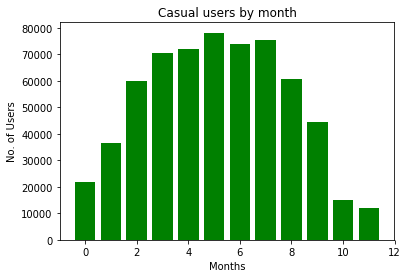

In [0]:
# Solution to question 3


#result = np.zeros((0,3), dtype = int)
#for i in (np.unique(bike_array[:,2].astype(int))):
#    if i == 0:
#        year = 2011
#    else:
#        year = 2012
#    for m in (np.unique(bike_array[:,3].astype(int))):
#        month_array = (bike_array[:,3] == m) & (bike_array[:,2] == i)
#        users = np.sum(bike_array[month_array, 13].astype(int))
#        result = np.insert(result, 0, np.array((year, m, users)), 0)
#print(result)


result = []
for m in (np.unique(bike_array[:,3].astype(int))):
    users = np.sum((bike_array[bike_array[:,3] == m])[:, 13])
    result = np.insert(result, 0, users, 0)

plot = [i for i, _ in enumerate(result)]

plt.bar(plot, result, color='green')
plt.xlabel("Months")
plt.ylabel("No. of Users")
plt.title("Casual users by month")
plt.show()

(iv)
We will now look at the relationship between temperature and the number of users (column index 15). Your code should work out the average number of users for the following temperature ranges.

• 1, 6

• 6, 10

• 10, 15

• 15, 20

• 20, 25

• 25, 30

• 30, 35

• 35, 40

Remember the temperature values specified in the file have been normalised by dividing by 41.

In [0]:
# Solution to question 4

for i in range(0,8):
    temp_array = ((bike_array[:,9]*41) > (i*5 if i*5 > 9 else (i*5)+1)) & ((bike_array[:,9]*41) < ((i+1)*5 if ((i+1)*5) !=5 else 6))
    mean_users = np.mean(bike_array[temp_array, 15].astype(int))
    print("Average users at", (i*5 if i*5 > 9 else (i*5)+1), "-", (i+1)*5 if ((i+1)*5) !=5 else 6, "°C :", round(mean_users,2))




Average users at 1 - 6 °C : 51.85
Average users at 6 - 10 °C : 73.67
Average users at 10 - 15 °C : 123.72
Average users at 15 - 20 °C : 168.44
Average users at 20 - 25 °C : 209.51
Average users at 25 - 30 °C : 234.74
Average users at 30 - 35 °C : 330.33
Average users at 35 - 40 °C : 317.92
